---
# <center> **Foundations of Applied Machine Learning**
## <center> Winter 2024

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **[Sina Taamoli](https://sinataamoli.github.io/)** | email: *sina.taamoli@email.ucr.edu* | [Course webpage](https://github.com/sinataamoli/Foundations-of-Applied-Machine-Learning)
### <center> Week 3 (Jan 24th): Least Squares
---

# Fitting any model with Least Squared:
Here let's look at the function with few parameters:


$$
y = f(x) = \alpha x e^{\gamma x}
$$

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def f(x, α, γ):
    return α * x * exp(γ * x)

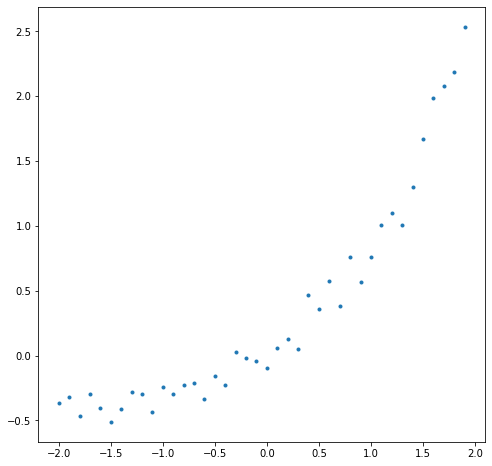

In [2]:
np.random.seed(4)

α, γ = 0.5, 0.5

x_span = [i/100 for i in range(-200, 200, 10)]
y_span = [f(i, α, γ) + 0.1 * np.random.randn() for i in x_span]

plt.figure(figsize=(8, 8))

plt.plot(x_span, y_span, ".")

plt.show()

In [3]:
def least_squared(y_measured, y_prediction):
    ls = []
    for y0, y1 in zip(y_measured, y_prediction):
        ls.append((y0 - y1)**2)
    return sum(ls)**0.5

In [4]:
def prob(l):
    return exp(-l**2)

This is the prior for the $\alpha$, and $\gamma$, which we will choose to be uniform.

In [5]:
α_span = np.linspace(0.2, 0.8, 300)
γ_span = np.linspace(0.2, 0.9, 300)

Going through the parameters sampling to find the pair that makes the least squared function minimum. (equavalently makes the `prob` function maximum. 

In [6]:
values = []
for alpha in α_span:
    for gamma in γ_span:
        y_prediction = [f(x, alpha, gamma) for x in x_span]
        y_measured = y_span
        values.append((prob(least_squared(y_measured, y_prediction)), alpha, gamma))

In [7]:
values

[(2.83708665586056e-08, 0.2, 0.2),
 (2.9438540209695363e-08, 0.2, 0.20234113712374582),
 (3.05493770792368e-08, 0.2, 0.20468227424749164),
 (3.1705233146972085e-08, 0.2, 0.20702341137123748),
 (3.290804851698236e-08, 0.2, 0.2093645484949833),
 (3.4159851407236466e-08, 0.2, 0.2117056856187291),
 (3.54627623358571e-08, 0.2, 0.21404682274247494),
 (3.681899851413436e-08, 0.2, 0.21638795986622075),
 (3.8230878456841596e-08, 0.2, 0.21872909698996656),
 (3.9700826820963957e-08, 0.2, 0.22107023411371238),
 (4.123137948453248e-08, 0.2, 0.2234113712374582),
 (4.2825188877875616e-08, 0.2, 0.22575250836120403),
 (4.4485029580244505e-08, 0.2, 0.22809364548494984),
 (4.621380419545377e-08, 0.2, 0.23043478260869565),
 (4.801454952090314e-08, 0.2, 0.2327759197324415),
 (4.989044302509702e-08, 0.2, 0.2351170568561873),
 (5.184480964959166e-08, 0.2, 0.23745819397993312),
 (5.388112895212902e-08, 0.2, 0.23979933110367893),
 (5.6003042608619347e-08, 0.2, 0.24214046822742474),
 (5.821436229255939e-08, 0.2

finding the pairs sorted with respect to their probabilities:

In [8]:
sorted(values, key=lambda x : x[0], reverse=True)[:5]

[(0.6601053140901147, 0.5090301003344482, 0.49966555183946487),
 (0.6600499054466553, 0.5070234113712375, 0.5020066889632107),
 (0.6600216832077364, 0.5110367892976588, 0.49732441471571903),
 (0.6599868649784066, 0.5090301003344482, 0.49732441471571903),
 (0.6599684206411858, 0.5070234113712375, 0.49966555183946487)]

In [9]:
A, B = sorted(values, key=lambda x: x[0], reverse = True)[0][1], sorted(values, key=lambda x: x[0], reverse = True)[0][2]

In [10]:
A, B

(0.5090301003344482, 0.49966555183946487)

## Plotting the probability density: $p(\alpha, \gamma | data)$

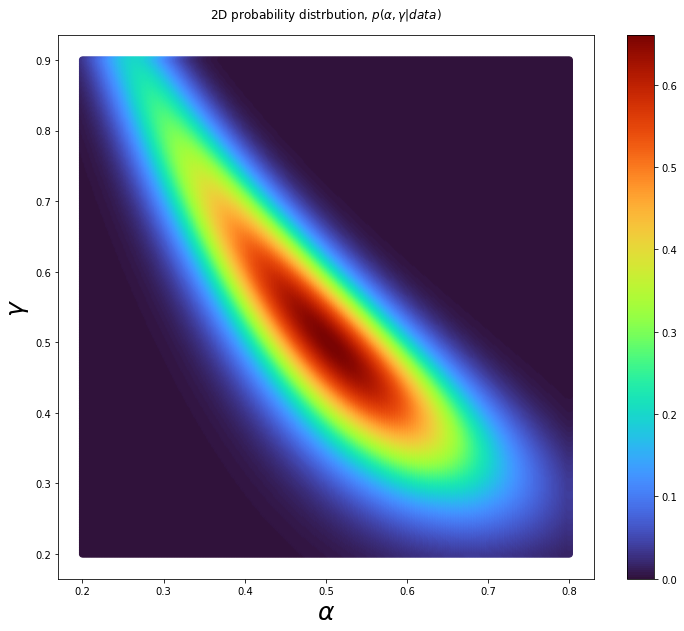

In [11]:
X = [value[1] for value in values]
Y = [value[2] for value in values]
Z = [value[0] for value in values]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r"2D probability distrbution, $p(\alpha, \gamma | data)$", y = 1.02)

c = ax.scatter(X, Y, c = Z, cmap = "turbo")

ax.set_xlabel(r"$\alpha$", fontsize=25)
ax.set_ylabel(r"$\gamma$", fontsize=25)

plt.colorbar(c)
plt.show()

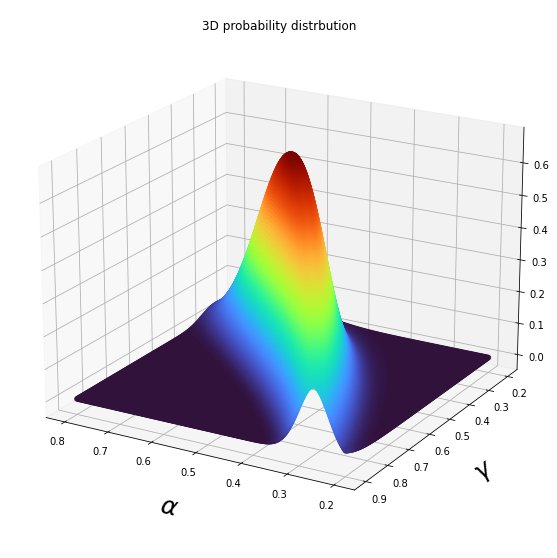

In [12]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(10, 10))

ax = plt.axes(projection='3d',)
ax.view_init(azim=120, elev=20)

ax.scatter3D(X, Y, Z, c = Z, cmap = "turbo")

ax.set_title(r"3D probability distrbution", y=1.03)

ax.set_xlabel(r"$\alpha$", fontsize=25, labelpad=20)
ax.set_ylabel(r"$\gamma$", fontsize=25, labelpad=20)
ax.set_zlabel(r"$P(\alpha, \gamma | data)$", fontsize=25, labelpad=20)

plt.show()

In [13]:
A, B

(0.5090301003344482, 0.49966555183946487)

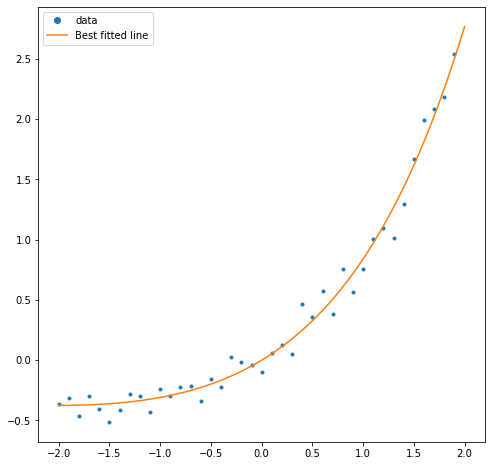

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_span, y_span, ".", label="data")

x_span1 = np.linspace(-2, 2, 50)
ax.plot(x_span1, [f(x, A, B) for x in x_span1], label="Best fitted line")

ax.legend(markerscale=2)
plt.show()

---
# Bayesian Inference:


In [15]:
data = np.array([16, 24, 16, 12, 16, 11, 14, 15, 9, 14, 7])

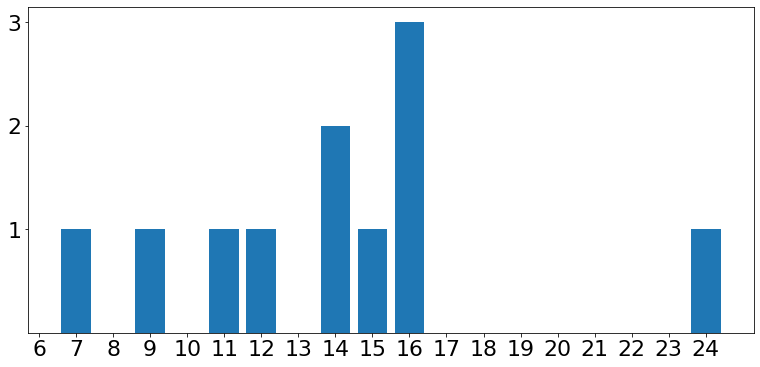

In [16]:
plt.figure(figsize=(13, 6))

labels, counts = np.unique(data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks(range(6, 25))
plt.yticks(range(1, 4))
plt.tick_params(labelsize=22);

## Poisson distribution?

$$p(k \mid \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

In [17]:
from math import factorial

In [18]:
@np.vectorize
def poisson(k, λ=2):
    return λ**k * np.exp(-λ) / factorial(k)

In [19]:
ks = np.arange(0, 25)
ps = poisson(ks, 2.2)

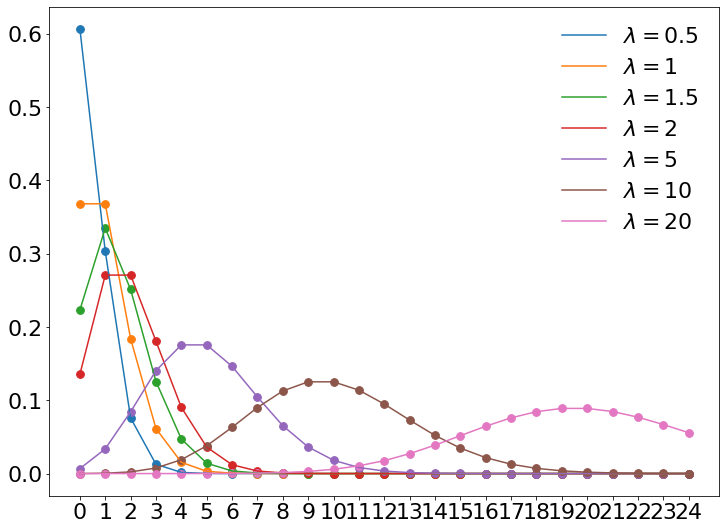

In [20]:
plt.figure(figsize=(12, 9))

for λ in [0.5, 1, 1.5, 2, 5, 10, 20]:
    ps = poisson(ks, λ)
    plt.plot(ks, ps, label=r"$\lambda = {}$".format(λ))
    plt.scatter(ks, ps, s=60)
plt.xticks(ks)
plt.legend(frameon=False, fontsize=22)
plt.tick_params(labelsize=22);

### Model:
$$
p(\lambda) = \frac{1}{\lambda_{max} - \lambda_{min}} \\
p(k \mid \lambda) = \frac{\lambda^k e^{-\lambda}}{k!} \\
$$
Using Bayes:
$$
p(\lambda | \text{data}) \propto p(\text{data} \mid \lambda) p(\lambda)  \\
p(\text{data} \mid \lambda) = \prod_{k}p(k \mid \lambda)\\
\ln(p(\lambda | \text{data})) \propto \ln(p(\lambda)) + \sum_k \ln(p(k \mid \lambda))
$$

In [21]:
@np.vectorize
def ln_prior(λ, MIN, MAX):
    p = 1 / (MAX - MIN)
    if MIN <= λ <= MAX:
        return np.log(p)
    else:
        return -np.inf

In [22]:
def ln_likelihood(ks, λ):
    return np.sum(np.log(poisson(ks, λ)))

In [23]:
MIN, MAX = 0.001, 100
λ_span = np.linspace(MIN, MAX, 3000)

In [24]:
Π_min, Π_max = 5, 20

ln_posterior = []
ln_likelihoods = []

for λ in λ_span:
    ln_posterior += [ln_prior(λ, Π_min, Π_max) + ln_likelihood(data, λ)]
    ln_likelihoods += [ln_likelihood(data, λ)]
    
ln_posterior = np.array(ln_posterior)
ln_likelihoods = np.array(ln_likelihoods)

In [25]:
from scipy.integrate import trapz

In [26]:
posterior_probability = np.exp(ln_posterior) / trapz(np.exp(ln_posterior), λ_span)

likelihoods = (np.exp(ln_likelihoods) / np.exp(ln_likelihoods).max()) * max(posterior_probability)

prior = np.exp(ln_prior(λ_span, Π_min, Π_max))

In [27]:
MAP_estimate = float(λ_span[posterior_probability == posterior_probability.max()])

In [28]:
MAP_estimate, data.mean()

(14.005528176058684, 14.0)

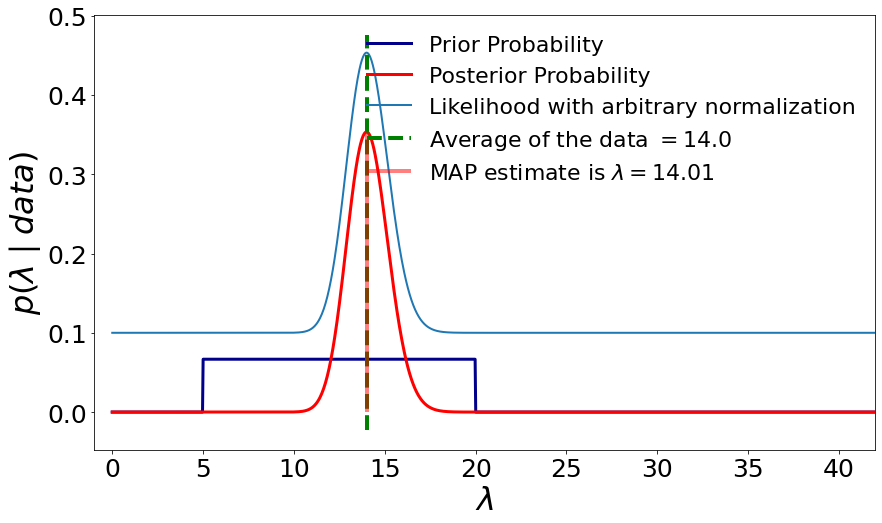

In [29]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(λ_span, prior, label="Prior Probability", color="darkblue", lw=3)
ax.plot(λ_span, posterior_probability, label="Posterior Probability", color="r", lw=3)

ax.plot(λ_span, likelihoods + 0.1, label="Likelihood with arbitrary normalization", lw=2)


ax.vlines(data.mean(), *plt.gca().get_ylim(), label=r"Average of the data $={}$".format(round(data.mean(), 2)), color="g", ls="--", lw=4)

ax.vlines(MAP_estimate, 0, posterior_probability.max(), label=r"MAP estimate is $\lambda = {}$".format(round(MAP_estimate, 2)), color="r", lw=4, alpha=0.5)

ax.tick_params(labelsize=25)

ax.set_xlabel(r"$\lambda$", fontsize=32)
ax.set_ylabel(r"$p(\lambda \mid data)$", fontsize=32)

ax.set_xlim(-1, 42)

ax.legend(fontsize=22, frameon=False, loc="upper right");

## Posterior Predictive Probability:

$$
p(x_n \mid \{x_i\}_{i=1}^{n-1}) = \int d\lambda p(x_n, \lambda \mid \{x_i\}_{i=1}^{n-1}) = \int d\lambda p(x_n \mid \lambda, \{x_i\}_{i=1}^{n-1}) p(\lambda \mid \{x_i\}_{i=1}^{n-1}) = \int d\lambda p(x_n \mid \lambda) p(\lambda \mid \{x_i\}_{i=1}^{n-1}) \\
\to \boxed{p(x_n \mid \{x_i\}_{i=1}^{n-1}) = \int d\lambda p(x_n \mid \lambda) p(\lambda \mid \{x_i\}_{i=1}^{n-1})}
$$

In [30]:
x_span = np.arange(1, 100, dtype=int)
posterior_predictive = []
for x in x_span:
    p = poisson(x, λ_span)
    posterior_predictive += [trapz(p * posterior_probability, λ_span)]
    
posterior_predictive = np.array(posterior_predictive)

In [31]:
float(x_span[posterior_predictive == posterior_predictive.max()])

13.0

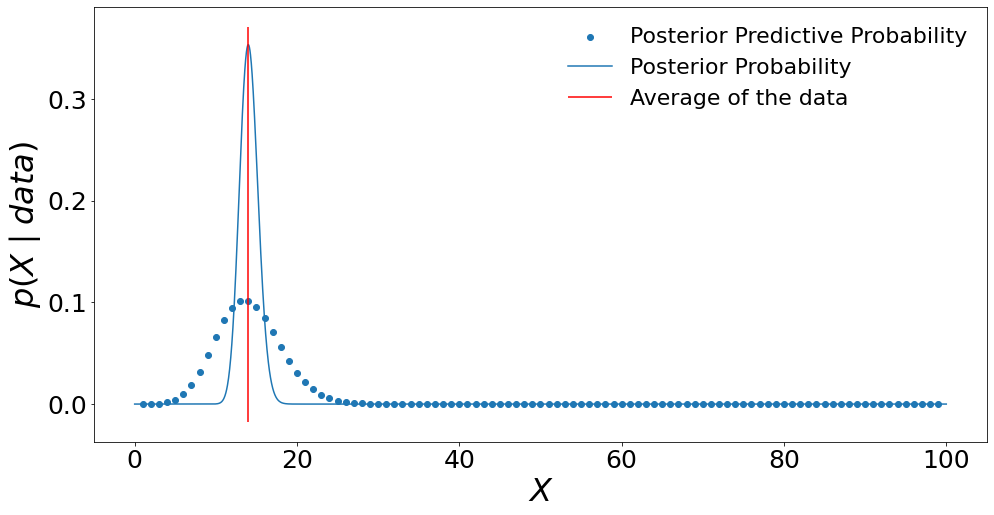

In [32]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_span, posterior_predictive, label="Posterior Predictive Probability")
# ax.hist(data, density=True, alpha=0.1)

ax.plot(λ_span, posterior_probability, label="Posterior Probability")
ax.vlines(data.mean(), *plt.gca().get_ylim(), label="Average of the data", color="r")
ax.tick_params(labelsize=25)

ax.set_xlabel(r"$X$", fontsize=32)
ax.set_ylabel(r"$p(X \mid data)$", fontsize=32)

ax.legend(fontsize=22, frameon=False, loc="upper right");

In [33]:
posterior_predictive.sum()

0.9999986107711829

In [34]:
sample = np.random.choice(x_span, p=posterior_predictive/posterior_predictive.sum(), size=50000)

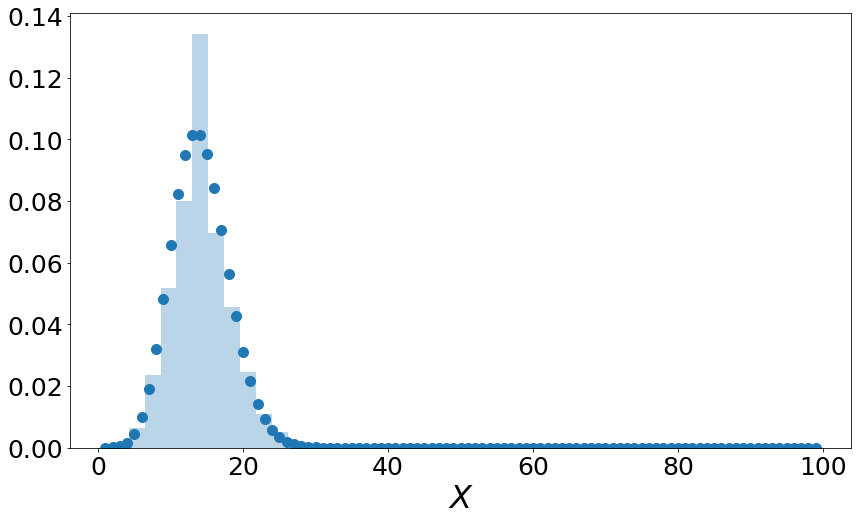

In [35]:
plt.figure(figsize=(14, 8))
plt.hist(sample, density=True, alpha=0.3, bins=15)
plt.scatter(x_span, posterior_predictive, label="Predictive Posterior Probability", s=100)

plt.tick_params(labelsize=25)

plt.xlabel(r"$X$", fontsize=32)

plt.show()

In [36]:
sample[:40]

array([15, 11, 14, 11, 20, 13, 18, 13, 19, 13, 12, 15, 18, 18, 15,  9, 15,
       11, 16, 19, 14, 15,  8, 14, 10, 15, 13, 17,  8,  9, 16, 14, 15, 18,
       14, 17, 14, 20, 16, 10])

### Without integral and using a generative process
$$
\lambda \sim p(\lambda \mid {data}) \\
x \sim p(x \mid \lambda)
$$

In [37]:
sample_1 = []
for i in range(10000):
    λ = np.random.choice(λ_span, p=posterior_probability/posterior_probability.sum())
    sample_1 += [np.random.poisson(lam=λ)]

In [38]:
sample_1[:20]

[16, 7, 9, 11, 19, 15, 11, 15, 8, 4, 12, 16, 14, 14, 16, 15, 14, 10, 15, 9]

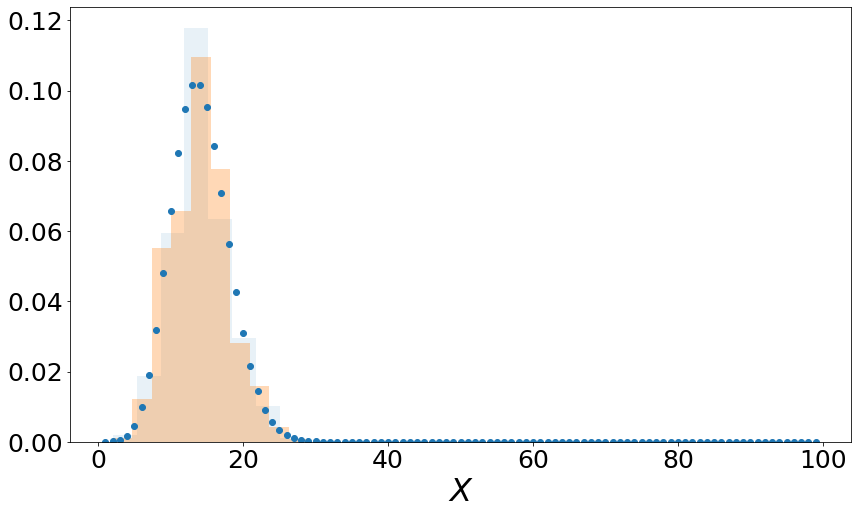

In [39]:
plt.figure(figsize=(14, 8))

plt.hist(sample, density=True, alpha=0.1)
plt.hist(sample_1, density=True, alpha=0.3)
plt.scatter(x_span, posterior_predictive, label="Predictive Posterior Probability", )
plt.tick_params(labelsize=25)

plt.xlabel(r"$X$", fontsize=32)


plt.show()